In [1]:
#各データの散布図ではなく,平均+-errで散布図を描画できるようにする
#

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import os
import scipy
from scipy import stats
from matplotlib import pyplot as plt
# loading original module
import NeuroProcessing
import re

In [3]:
#abr_lfpのz_scoreを収集する
deaf_files_path = Path("./deaf_datas")
deaf_files = list(deaf_files_path.glob("*"))
intact_files_path = Path("./intact_datas/")
intact_files = list(intact_files_path.glob("*"))
#pdのファイルの結合
deaf_datas = pd.concat([pd.read_csv(deaf_file) for deaf_file in deaf_files])
intact_datas = pd.concat([pd.read_csv(intact_file) for intact_file in intact_files])
deaf_datas = deaf_datas.dropna()
intact_datas = intact_datas.dropna()

In [4]:
alive_deaf_data = deaf_datas.loc[~(deaf_datas["filename"].str.contains("overdose"))]
alive_intact_data = intact_datas.loc[~(intact_datas["filename"].str.contains("overdose"))]
alive_deaf_data = alive_deaf_data.loc[~(alive_deaf_data["stim_params"].str.contains("(?:200V|prf|300V|75V|70dB)"))]
alive_intact_data = alive_intact_data.loc[~(alive_intact_data["stim_params"].str.contains("(?:200V|prf|300V|75V|70dB)"))]
alive_deaf_data = alive_deaf_data.sort_values("stim_params")
alive_intact_data = alive_intact_data.sort_values("stim_params")
deaf_each_stim_data = alive_deaf_data.groupby(by=["stim_params"])
intact_each_stim_data = alive_intact_data.groupby(by = ["stim_params"])

print(deaf_each_stim_data.mean().index)

Index(['150V_d_0.5ms_f_500.0kHz_w_0%', '150V_d_0.5ms_f_500.0kHz_w_10%',
       '150V_d_0.5ms_f_500.0kHz_w_25%', '150V_d_1.0ms_f_500.0kHz_w_0%',
       '150V_d_1.0ms_f_500.0kHz_w_10%', '150V_d_1.0ms_f_500.0kHz_w_25%',
       '150V_d_10.0ms_f_500.0kHz_w_0%', '150V_d_10.0ms_f_500.0kHz_w_10%',
       '150V_d_10.0ms_f_500.0kHz_w_25%', '150V_d_20.0ms_f_500.0kHz_w_0%',
       '150V_d_20.0ms_f_500.0kHz_w_10%', '150V_d_20.0ms_f_500.0kHz_w_25%',
       '150V_d_5.0ms_f_500.0kHz_w_0%', '150V_d_5.0ms_f_500.0kHz_w_10%',
       '150V_d_5.0ms_f_500.0kHz_w_25%', '20dB', '30dB', '40dB', '50dB', '60dB',
       'sham'],
      dtype='object', name='stim_params')


C:\Users\smasa\AppData\Local\Temp/ipykernel_21796/4208122551.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(deaf_each_stim_data.mean().index)


In [5]:
intact_each_stim_data.mean(numeric_only=True)

,date,abr_z_score,abr_latency,lfp_z_score_100,lfp_latency_100,lfp_ampliture_100,lfp_z_score_200,lfp_latency_200,lfp_ampliture_200,lfp_z_score_300,...,lfp_ampliture_500,lfp_z_score_600,lfp_latency_600,lfp_ampliture_600,lfp_z_score_700,lfp_latency_700,lfp_ampliture_700,lfp_z_score_800,lfp_latency_800,lfp_ampliture_800
stim_params,,,,,,,,,,,,,,,,,,,,,
150V_d_0.5ms_f_500.0kHz_w_0%,2.022094e+07,5.668715,2.320000,41.867641,28.600000,-122.823128,54.107619,29.200000,-167.357330,56.344069,...,-266.828737,64.404668,31.800000,-256.663355,52.538343,30.200000,-216.511653,45.771348,30.000000,-182.245742
150V_d_0.5ms_f_500.0kHz_w_10%,2.022094e+07,6.167672,1.632000,19.463331,19.200000,-85.075247,25.582179,19.800000,-113.928858,26.768838,...,-147.442732,37.059763,33.400000,-134.302402,52.369089,33.000000,-107.329100,35.542368,22.600000,-93.147326
150V_d_0.5ms_f_500.0kHz_w_25%,2.022094e+07,5.968144,1.656000,34.653599,28.600000,-96.941158,49.403662,29.800000,-137.362571,63.660593,...,-212.494274,88.543001,32.600000,-204.807043,85.446272,36.600000,-170.958639,61.429396,32.000000,-147.081420
150V_d_1.0ms_f_500.0kHz_w_0%,2.022094e+07,8.710234,2.472000,38.039832,28.200000,-107.025923,34.152251,28.600000,-145.088149,34.905718,...,-229.882012,42.300978,29.400000,-241.895277,44.529078,27.800000,-228.357442,47.586772,32.200000,-200.393499
150V_d_1.0ms_f_500.0kHz_w_10%,2.022094e+07,7.028710,2.472000,42.284371,29.000000,-108.975233,37.746442,38.200000,-140.251297,45.468766,...,-160.411404,44.006243,30.400000,-144.289617,35.236329,28.400000,-123.475657,38.421683,37.600000,-110.611517
150V_d_1.0ms_f_500.0kHz_w_25%,2.022095e+07,5.163409,2.120000,35.513426,28.857143,-156.223805,47.208973,39.571429,-189.094277,47.955729,...,-234.582733,55.218896,30.714286,-231.068316,88.922194,30.428571,-190.071009,71.897836,35.000000,-160.141963
150V_d_10.0ms_f_500.0kHz_w_0%,2.022094e+07,8.531197,2.432000,47.273227,30.000000,-108.696002,50.479540,31.200000,-151.336164,67.285756,...,-267.023610,68.172554,31.600000,-266.678968,67.260577,29.200000,-231.198462,65.858771,28.800000,-206.007721
150V_d_10.0ms_f_500.0kHz_w_10%,2.022094e+07,5.163501,2.408000,43.396927,24.800000,-68.515482,52.238817,45.200000,-109.928442,58.459380,...,-205.033540,85.606582,28.400000,-221.694098,81.020560,27.200000,-198.173097,69.543012,30.400000,-168.446956
150V_d_10.0ms_f_500.0kHz_w_25%,2.022094e+07,3.988007,2.305000,138.630927,35.375000,-253.232956,164.418192,35.875000,-333.851561,160.266384,...,-400.093037,172.828869,36.000000,-390.264621,168.321630,34.750000,-322.460716,158.021228,37.750000,-265.998585


In [6]:
# 各刺激に対してscatterを記載する
stim_parameters = alive_deaf_data.columns[3:]
print(stim_parameters)
# for each_param in stim_

Index(['abr_z_score', 'abr_latency', 'lfp_z_score_100', 'lfp_latency_100',
       'lfp_ampliture_100', 'lfp_z_score_200', 'lfp_latency_200',
       'lfp_ampliture_200', 'lfp_z_score_300', 'lfp_latency_300',
       'lfp_ampliture_300', 'lfp_z_score_400', 'lfp_latency_400',
       'lfp_ampliture_400', 'lfp_z_score_500', 'lfp_latency_500',
       'lfp_ampliture_500', 'lfp_z_score_600', 'lfp_latency_600',
       'lfp_ampliture_600', 'lfp_z_score_700', 'lfp_latency_700',
       'lfp_ampliture_700', 'lfp_z_score_800', 'lfp_latency_800',
       'lfp_ampliture_800'],
      dtype='object')


In [7]:
depths = range(100,900,100)
#abr_z_scoreと各lfp_z_scoreの関係を散布図にプロット
abr_intact_mean = intact_each_stim_data.mean(numeric_only=True)["abr_z_score"]
abr_intact_std = intact_each_stim_data.std(numeric_only=True)["abr_z_score"]
abr_intact_err = abr_intact_std/np.sqrt(intact_each_stim_data.size())
abr_deaf_mean = deaf_each_stim_data.mean(numeric_only=True)["abr_z_score"]
abr_deaf_std = deaf_each_stim_data.std(numeric_only=True)["abr_z_score"]
abr_deaf_err = abr_deaf_std/np.sqrt(intact_each_stim_data.size())
    

In [8]:
def stim_param(stim_param):
    if "kHz" in stim_param:
        duration = re.search("(\d+\.\d+)ms",stim_param).group(1)
        window = re.search("w_(\d+)%",stim_param).group(1)
        duration = round(float(duration),1)
        return f"({duration}, {int(window)*2})"
    elif "dB" in stim_param:
        return f"Click {stim_param}"
    else:
        return stim_param
def color_label(stim_param):
    color_dict = {"0": "blue",
                  "10": "black",
                  "25": "orange",
                  "sound": "red",
                  "sham": "grey"}
    if "kHz" in stim_param:
        window = re.search("w_(\d+)%",stim_param).group(1)
        return color_dict[window]
    elif "dB" in stim_param:
        return color_dict["sound"]
    else:
        return color_dict["sham"]
def marker_style(stim_param):
    marker_dict = {"0.5": ".",
                   "1.0": "v",
                   "5.0": "^",
                   "10.0": "x",
                   "20.0": "D",
                   "sham": "d",
                   "20dB": ".",
                   "30dB": "v",
                   "40dB": "^",
                   "50dB": "x",
                   "60dB": "D",
                   "70dB": "d"}
    if "kHz" in stim_param:
        duration = re.search("(\d+\.\d+)ms",stim_param).group(1)
        window = re.search("w_(\d+)%",stim_param).group(1)
        duration = str(round(float(duration),1))
        return marker_dict[duration]
    else:
        return marker_dict[stim_param]
        
        
        

In [9]:
threshold_pd = pd.read_csv("./result/shapilo-wilk-test_and_mahanobis-boundary.csv",index_col=0)
abr_threshold = threshold_pd.loc["abr_z_score","two_side_5%_sham"]
# threshold_pd
abr_threshold

4.361461566725375

C:\Users\smasa\AppData\Local\Temp/ipykernel_21796/3703637297.py:42: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate("",xy=(deaf_stim_a_m,deaf_stim_l_m),size=5,xytext=(intact_stim_a_m,intact_stim_l_m),arrowprops=arrow_dict)
C:\Users\smasa\AppData\Local\Temp/ipykernel_21796/3703637297.py:42: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate("",xy=(deaf_stim_a_m,deaf_stim_l_m),size=5,xytext=(intact_stim_a_m,intact_stim_l_m),arrowprops=arrow_dict)
C:\Users\smasa\AppData\Local\Temp/ipykernel_21796/3703637297.py:42: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate("",xy=(deaf_stim_a_m,deaf_stim_l_m),size=5,xytext=(intact_stim_a_m,intact_stim_l_m),arrowprops=arrow_dict)
C:\Users\smasa\AppData\Local\Temp/ipykernel_21796/3703637297.py:42: UserWarning: Setting the 'color' property will override the edgecolor or facecol

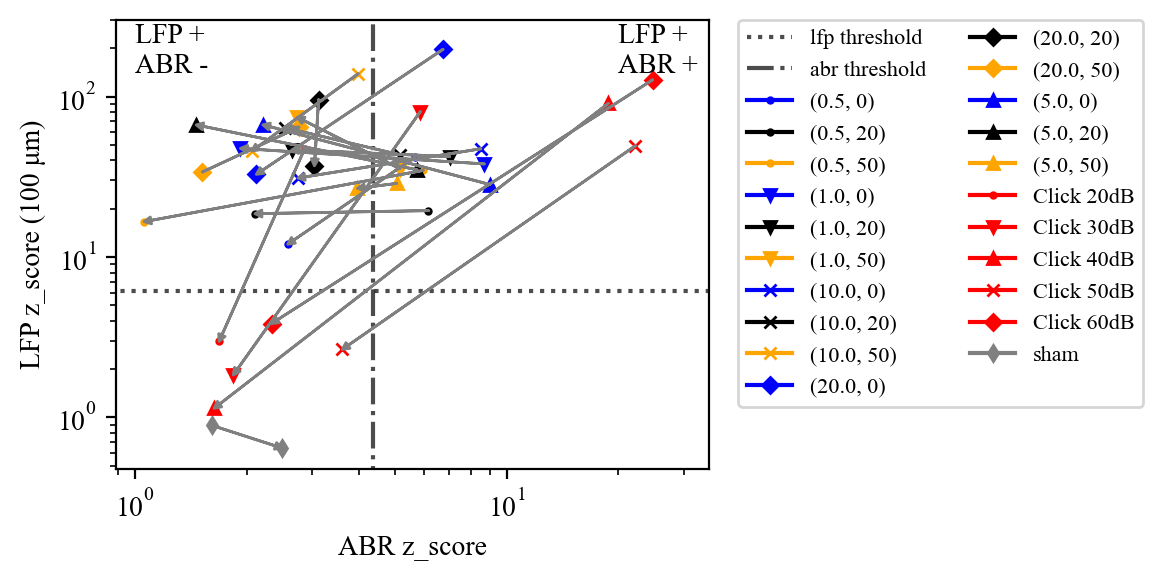

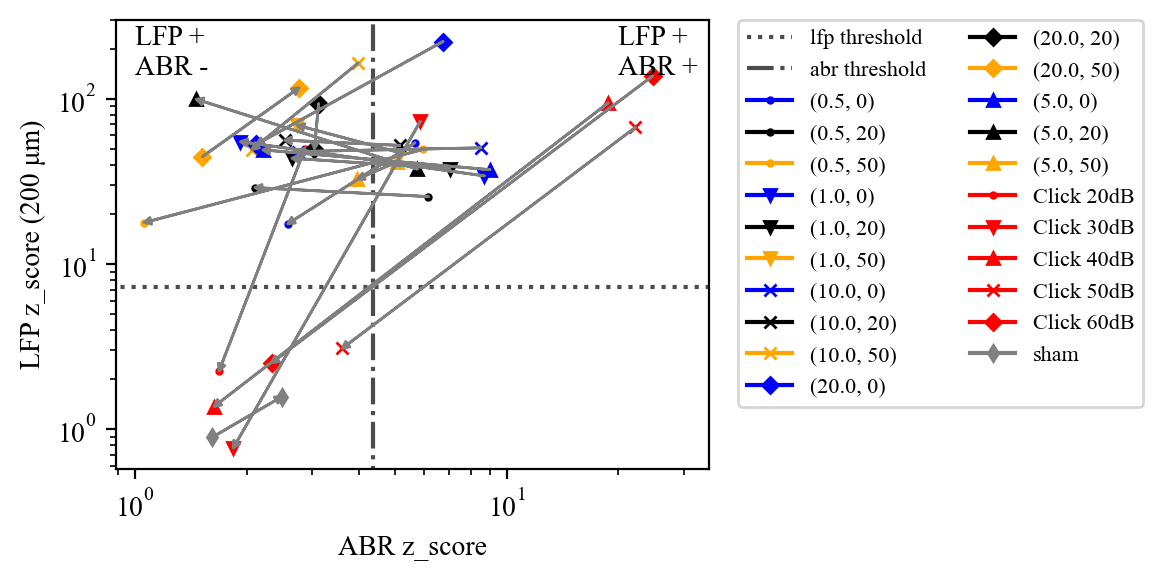

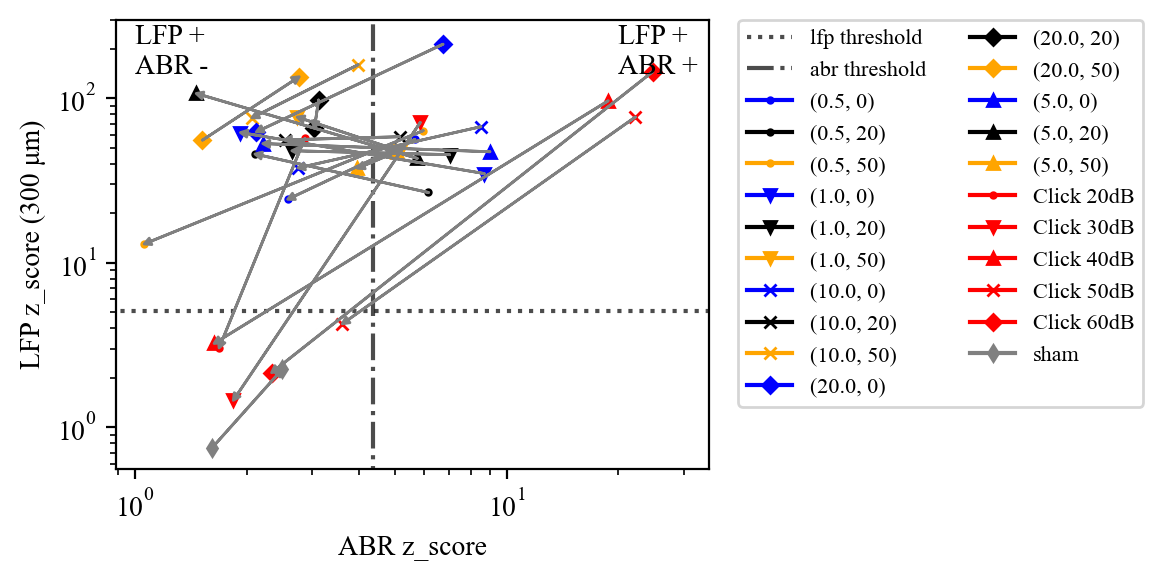

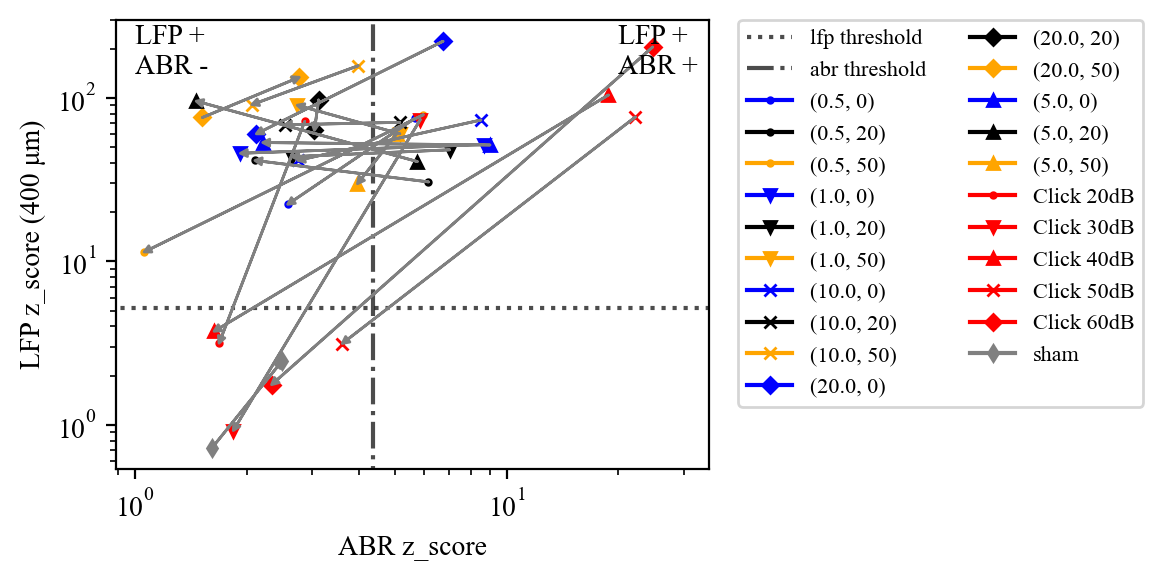

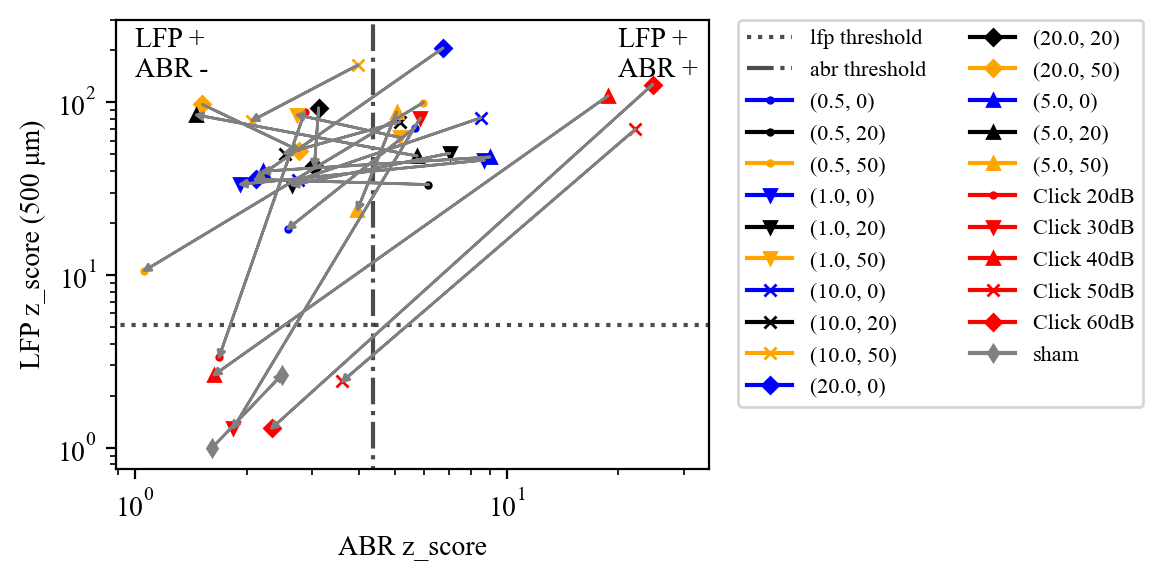

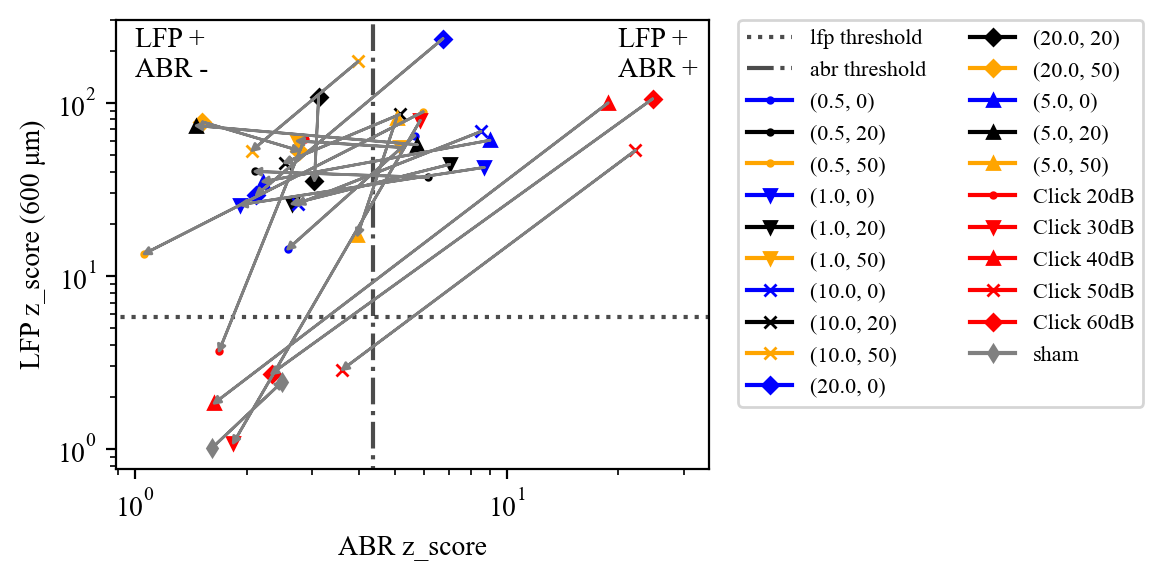

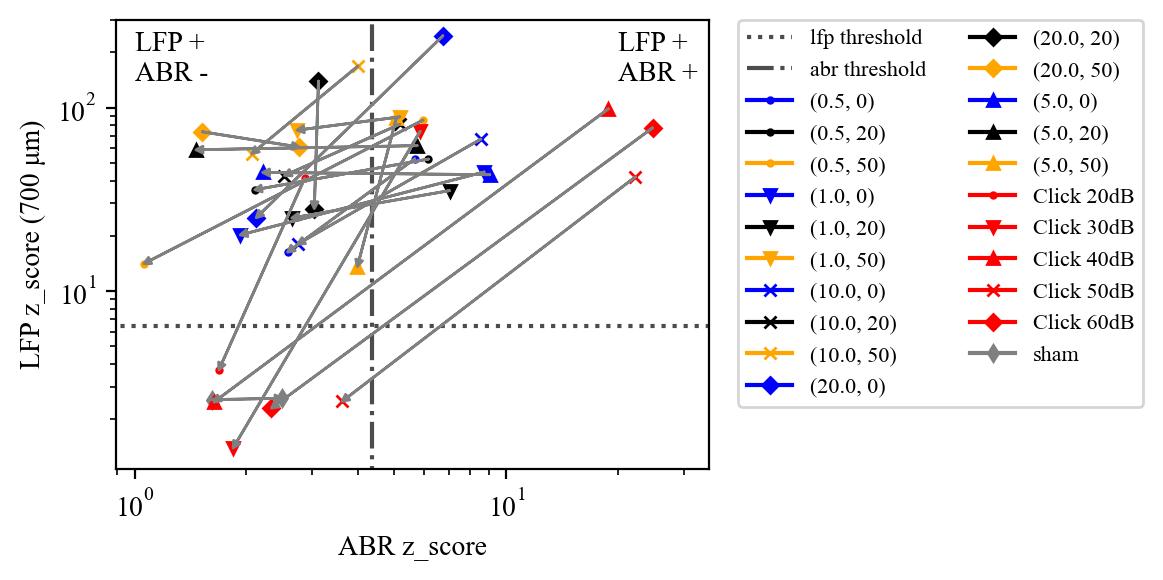

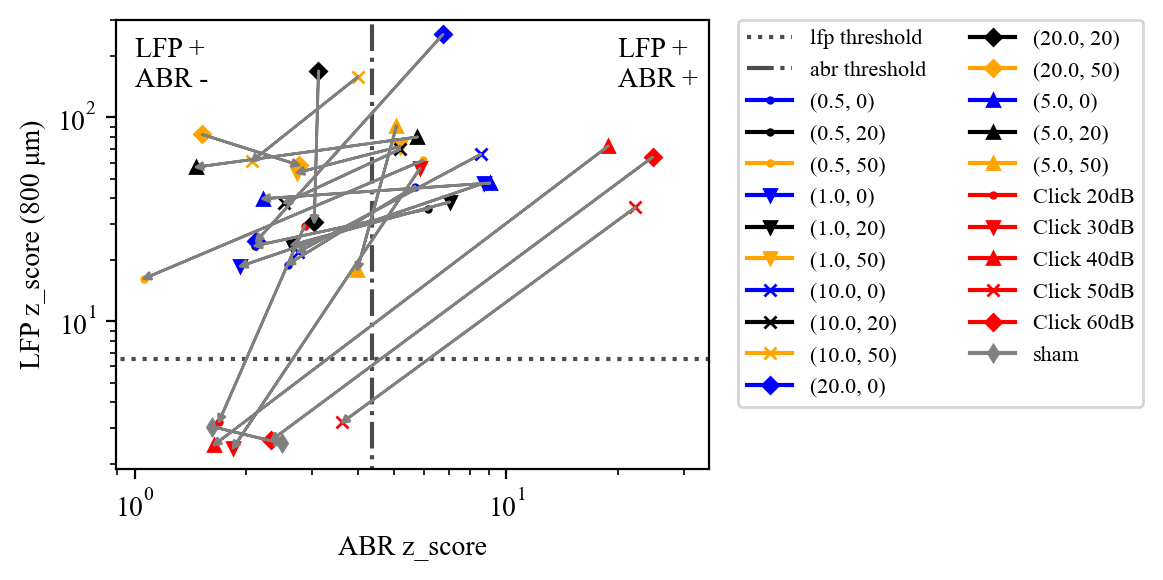

In [60]:
each_stim_mean_err_df = pd.DataFrame(columns=[])
each_stim_mean_err_df["stim_params"] = list(deaf_each_stim_data.mean(numeric_only=True).index)
each_stim_mean_err_df["intact_abr_mean"] = abr_intact_mean.values
each_stim_mean_err_df["intact_abr_std"] = abr_intact_std.values
each_stim_mean_err_df["intact_abr_err"] = list(abr_intact_err)
each_stim_mean_err_df["deaf_abr_mean"] = abr_deaf_mean.values
each_stim_mean_err_df["deaf_abr_std"] = abr_deaf_std.values
each_stim_mean_err_df["deaf_abr_err"] = list(abr_deaf_err)
arrow_dict = dict(shrink=0, width=0, headwidth=2.5, 
                headlength=2.5, connectionstyle='arc3',
                facecolor='gray', edgecolor='gray', color = "grey")
os.makedirs("./result/abr_lfp_zscore_difference_without_arrow",exist_ok=True)
os.makedirs("./result/abr_lfp_zscore_difference_with_arrow",exist_ok=True)
for depth in depths:
    lfp_threshold = threshold_pd.loc[f"lfp_z_score_{depth}","two_side_5%_sham"]
    fig,ax = plt.subplots(figsize=(6,3),dpi=200)
    each_depth_intact_mean = intact_each_stim_data.mean(numeric_only=True)[f"lfp_z_score_{depth}"]
    each_depth_intact_std = intact_each_stim_data.std(numeric_only=True)[f"lfp_z_score_{depth}"]
    each_depth_intact_err = each_depth_intact_std/np.sqrt(intact_each_stim_data.size())
    each_depth_deaf_mean = deaf_each_stim_data.mean(numeric_only=True)[f"lfp_z_score_{depth}"]
    each_depth_deaf_std = deaf_each_stim_data.std(numeric_only=True)[f"lfp_z_score_{depth}"]
    each_depth_deaf_err = each_depth_deaf_std/np.sqrt(deaf_each_stim_data.size())
    each_stim_mean_err_df[f"intact_lfp_{depth}_mean"] = each_depth_intact_mean.values
    each_stim_mean_err_df[f"intact_lfp_{depth}_std"] = each_depth_intact_std.values
    each_stim_mean_err_df[f"intact_lfp_{depth}_err"] = list(each_depth_intact_err)
    each_stim_mean_err_df[f"deaf_lfp_{depth}_mean"] = each_depth_deaf_mean.values
    each_stim_mean_err_df[f"deaf_lfp_{depth}_std"] = each_depth_deaf_std.values
    each_stim_mean_err_df[f"deaf_lfp_{depth}_err"] = list(each_depth_deaf_err)
    for each_stim_a_m,each_stim_a_e,each_stim_l_m,each_stim_l_e, stim_name in zip(abr_intact_mean,abr_intact_err,each_depth_intact_mean,each_depth_intact_err,list(deaf_each_stim_data.mean(numeric_only=True).index)):
        ax.errorbar(each_stim_a_m,each_stim_l_m,capsize=2,label=stim_param(stim_name),color=color_label(stim_name),marker=marker_style(stim_name),markersize=4)
    for each_stim_a_m,each_stim_a_e,each_stim_l_m,each_stim_l_e, stim_name in zip(abr_deaf_mean,abr_deaf_err,each_depth_deaf_mean,each_depth_deaf_err,list(deaf_each_stim_data.mean(numeric_only=True).index)):
        ax.errorbar(each_stim_a_m,each_stim_l_m,capsize=2,color=color_label(stim_name),marker=marker_style(stim_name),markersize=4)   
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_xlabel("ABR z_score")
    ax.set_ylabel(f"LFP z_score ({depth} μm)")
    ax.plot([-1,35],[lfp_threshold,lfp_threshold],color="k",linestyle=":",alpha=0.7,label="lfp threshold")
    ax.plot([abr_threshold,abr_threshold],[0,300],color="k",linestyle="-.",alpha=0.7,label="abr threshold")
    ax.set_xlim(right=35)
    ax.set_ylim(top=300)
    for deaf_stim_a_m,deaf_stim_l_m,intact_stim_a_m,intact_stim_l_m in zip(abr_deaf_mean,each_depth_deaf_mean,abr_intact_mean,each_depth_intact_mean):
        ax.annotate("",xy=(deaf_stim_a_m,deaf_stim_l_m),size=5,xytext=(intact_stim_a_m,intact_stim_l_m),arrowprops=arrow_dict)
    ax.text(1,140,"LFP +\nABR -")
    ax.text(20,140,"LFP +\nABR +")
    plt.legend(ncol=2,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=8)
    plt.tight_layout()
    plt.savefig(f"./result/abr_lfp_zscore_difference_with_arrow/lfp_{depth}.png",facecolor="white")
    #使用したデータをcsvに変換して出力    
each_stim_mean_err_df.to_csv("./result/each_stim_abr_lfp_mean_err.csv")

In [59]:
#ae_sensorのデータの読み込み
ae_mean_df = pd.read_csv("./ae_whole/ae_mean_data.csv")
ae_params = list(ae_mean_df.columns)[15:]

In [17]:
each_stim_mean_err_df
us_df = each_stim_mean_err_df[each_stim_mean_err_df["stim_params"].str.contains("kHz")]
us_df

,stim_params,intact_abr_mean,intact_abr_err,deaf_abr_mean,deaf_abr_err,intact_lfp_100_mean,intact_lfp_100_err,deaf_lfp_100_mean,deaf_lfp_100_err,intact_lfp_200_mean,...,deaf_lfp_600_mean,deaf_lfp_600_err,intact_lfp_700_mean,intact_lfp_700_err,deaf_lfp_700_mean,deaf_lfp_700_err,intact_lfp_800_mean,intact_lfp_800_err,deaf_lfp_800_mean,deaf_lfp_800_err
0,150V_d_0.5ms_f_500.0kHz_w_0%,5.668715,0.743006,2.578360,0.349045,41.867641,7.341384,12.008401,6.527104,54.107619,...,14.271379,6.892213,52.538343,17.248339,16.283958,8.605355,45.771348,8.885202,18.964359,12.420572
1,150V_d_0.5ms_f_500.0kHz_w_10%,6.167672,0.715991,2.105201,0.402543,19.463331,8.077005,18.630982,7.514374,25.582179,...,40.071325,32.824606,52.369089,27.839290,35.636821,28.363629,35.542368,20.975683,23.414040,18.604468
2,150V_d_0.5ms_f_500.0kHz_w_25%,5.968144,1.770693,1.059925,0.244248,34.653599,9.014823,16.608346,10.845150,49.403662,...,13.404281,9.740380,85.446272,35.182305,14.094776,9.535774,61.429396,21.338808,16.176357,11.226911
3,150V_d_1.0ms_f_500.0kHz_w_0%,8.710234,1.237743,1.924479,0.253484,38.039832,13.137707,47.528093,36.406395,34.152251,...,25.767560,14.504445,44.529078,11.049933,20.215527,8.791242,47.586772,13.298149,18.591972,10.015291
4,150V_d_1.0ms_f_500.0kHz_w_10%,7.028710,1.425999,2.646057,0.193097,42.284371,15.035866,46.609625,23.902146,37.746442,...,26.044481,11.145472,35.236329,12.598592,24.984656,10.451749,38.421683,13.806641,23.625535,9.157372
5,150V_d_1.0ms_f_500.0kHz_w_25%,5.163409,0.943312,2.735309,0.353897,35.513426,12.026029,74.349654,22.738478,47.208973,...,60.080256,23.119337,88.922194,39.168222,75.260003,18.592657,71.897836,27.043988,53.475044,17.364969
6,150V_d_10.0ms_f_500.0kHz_w_0%,8.531197,2.046251,2.746538,0.306018,47.273227,16.984173,31.059075,14.811427,50.479540,...,26.094750,14.721048,67.260577,16.857332,18.013496,8.485380,65.858771,14.313079,21.792595,12.624457
7,150V_d_10.0ms_f_500.0kHz_w_10%,5.163501,1.210327,2.529263,0.492525,43.396927,23.378721,64.082588,30.545082,52.238817,...,45.023202,10.741234,81.020560,24.603701,42.601236,4.790095,69.543012,21.312998,37.984755,8.720395
8,150V_d_10.0ms_f_500.0kHz_w_25%,3.988007,0.548432,2.065780,0.461687,138.630927,52.497357,45.715031,14.616216,164.418192,...,52.910079,20.170489,168.321630,58.001222,56.001729,16.917222,158.021228,50.484019,60.825992,24.431077
9,150V_d_20.0ms_f_500.0kHz_w_0%,6.746632,1.542303,2.123538,0.517861,196.963099,78.449856,32.746234,4.174020,222.275531,...,29.295708,2.454589,246.061158,90.320288,25.074808,6.708547,254.768120,103.735427,24.618253,6.921580


In [20]:
duration=us_df["stim_params"].str.extract("(\d+\.*\d*)ms",expand=False)   
us_df["duration"]=list(map(float,duration))
window = us_df["stim_params"].str.extract("(\d+)%",expand=False)   
us_df["window"] = list(map(int,window))
us_df["window"] = us_df["window"]*2
us_df

C:\Users\smasa\AppData\Local\Temp/ipykernel_21796/3315038057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df["duration"]=list(map(float,duration))
C:\Users\smasa\AppData\Local\Temp/ipykernel_21796/3315038057.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df["window"] = list(map(int,window))
C:\Users\smasa\AppData\Local\Temp/ipykernel_21796/3315038057.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,stim_params,intact_abr_mean,intact_abr_err,deaf_abr_mean,deaf_abr_err,intact_lfp_100_mean,intact_lfp_100_err,deaf_lfp_100_mean,deaf_lfp_100_err,intact_lfp_200_mean,...,intact_lfp_700_mean,intact_lfp_700_err,deaf_lfp_700_mean,deaf_lfp_700_err,intact_lfp_800_mean,intact_lfp_800_err,deaf_lfp_800_mean,deaf_lfp_800_err,duration,window
0,150V_d_0.5ms_f_500.0kHz_w_0%,5.668715,0.743006,2.578360,0.349045,41.867641,7.341384,12.008401,6.527104,54.107619,...,52.538343,17.248339,16.283958,8.605355,45.771348,8.885202,18.964359,12.420572,0.5,0
1,150V_d_0.5ms_f_500.0kHz_w_10%,6.167672,0.715991,2.105201,0.402543,19.463331,8.077005,18.630982,7.514374,25.582179,...,52.369089,27.839290,35.636821,28.363629,35.542368,20.975683,23.414040,18.604468,0.5,20
2,150V_d_0.5ms_f_500.0kHz_w_25%,5.968144,1.770693,1.059925,0.244248,34.653599,9.014823,16.608346,10.845150,49.403662,...,85.446272,35.182305,14.094776,9.535774,61.429396,21.338808,16.176357,11.226911,0.5,50
3,150V_d_1.0ms_f_500.0kHz_w_0%,8.710234,1.237743,1.924479,0.253484,38.039832,13.137707,47.528093,36.406395,34.152251,...,44.529078,11.049933,20.215527,8.791242,47.586772,13.298149,18.591972,10.015291,1.0,0
4,150V_d_1.0ms_f_500.0kHz_w_10%,7.028710,1.425999,2.646057,0.193097,42.284371,15.035866,46.609625,23.902146,37.746442,...,35.236329,12.598592,24.984656,10.451749,38.421683,13.806641,23.625535,9.157372,1.0,20
5,150V_d_1.0ms_f_500.0kHz_w_25%,5.163409,0.943312,2.735309,0.353897,35.513426,12.026029,74.349654,22.738478,47.208973,...,88.922194,39.168222,75.260003,18.592657,71.897836,27.043988,53.475044,17.364969,1.0,50
6,150V_d_10.0ms_f_500.0kHz_w_0%,8.531197,2.046251,2.746538,0.306018,47.273227,16.984173,31.059075,14.811427,50.479540,...,67.260577,16.857332,18.013496,8.485380,65.858771,14.313079,21.792595,12.624457,10.0,0
7,150V_d_10.0ms_f_500.0kHz_w_10%,5.163501,1.210327,2.529263,0.492525,43.396927,23.378721,64.082588,30.545082,52.238817,...,81.020560,24.603701,42.601236,4.790095,69.543012,21.312998,37.984755,8.720395,10.0,20
8,150V_d_10.0ms_f_500.0kHz_w_25%,3.988007,0.548432,2.065780,0.461687,138.630927,52.497357,45.715031,14.616216,164.418192,...,168.321630,58.001222,56.001729,16.917222,158.021228,50.484019,60.825992,24.431077,10.0,50
9,150V_d_20.0ms_f_500.0kHz_w_0%,6.746632,1.542303,2.123538,0.517861,196.963099,78.449856,32.746234,4.174020,222.275531,...,246.061158,90.320288,25.074808,6.708547,254.768120,103.735427,24.618253,6.921580,20.0,0


In [21]:
whole_df = pd.merge(ae_mean_df,us_df)

In [22]:
whole_df

,stim_name,over_10000_ave_spectrum,below_audible_ave_spectrum,over_10000_sum_spectrum,below_audible_sum_spectrum,all_range_ave_spectrum,all_range_sum_spectrum,us_range_ave_spectrum,us_range_sum_spectrum,freq_over_3000_ave_spectrum,...,deaf_lfp_600_mean,deaf_lfp_600_err,intact_lfp_700_mean,intact_lfp_700_err,deaf_lfp_700_mean,deaf_lfp_700_err,intact_lfp_800_mean,intact_lfp_800_err,deaf_lfp_800_mean,deaf_lfp_800_err
0,1500mV_0.5ms_window_0.0%,4.210037e-08,0.000006,0.002946,0.200723,0.000002,1.044451,0.000008,0.791462,4.620330e-08,...,14.271379,6.892213,52.538343,17.248339,16.283958,8.605355,45.771348,8.885202,18.964359,12.420572
1,1500mV_0.5ms_window_10.0%,2.479822e-08,0.000007,0.001735,0.234594,0.000001,0.722746,0.000005,0.487438,3.134335e-08,...,40.071325,32.824606,52.369089,27.839290,35.636821,28.363629,35.542368,20.975683,23.414040,18.604468
2,1500mV_0.5ms_window_25.0%,4.092850e-08,0.000006,0.002865,0.196131,0.000001,0.724848,0.000005,0.527697,4.614802e-08,...,13.404281,9.740380,85.446272,35.182305,14.094776,9.535774,61.429396,21.338808,16.176357,11.226911
3,1500mV_1.0ms_window_0.0%,4.010468e-08,0.000006,0.002806,0.219652,0.000003,1.775990,0.000015,1.503439,4.520950e-08,...,25.767560,14.504445,44.529078,11.049933,20.215527,8.791242,47.586772,13.298149,18.591972,10.015291
4,1500mV_1.0ms_window_10.0%,2.465066e-08,0.000007,0.001724,0.237384,0.000002,1.285320,0.000010,1.047224,3.075730e-08,...,26.044481,11.145472,35.236329,12.598592,24.984656,10.451749,38.421683,13.806641,23.625535,9.157372
5,1500mV_1.0ms_window_25.0%,3.985813e-08,0.000007,0.002790,0.224038,0.000002,1.396741,0.000012,1.171667,4.478772e-08,...,60.080256,23.119337,88.922194,39.168222,75.260003,18.592657,71.897836,27.043988,53.475044,17.364969
6,1500mV_10.0ms_window_0.0%,2.146187e-08,0.000008,0.001502,0.273435,0.000015,11.987517,0.000117,11.682419,2.730043e-08,...,26.094750,14.721048,67.260577,16.857332,18.013496,8.485380,65.858771,14.313079,21.792595,12.624457
7,1500mV_10.0ms_window_10.0%,2.122635e-08,0.000008,0.001485,0.265256,0.000013,10.102837,0.000098,9.836812,2.686179e-08,...,45.023202,10.741234,81.020560,24.603701,42.601236,4.790095,69.543012,21.312998,37.984755,8.720395
8,1500mV_10.0ms_window_25.0%,2.159833e-08,0.000007,0.001512,0.247323,0.000011,8.331427,0.000081,8.083358,2.737593e-08,...,52.910079,20.170489,168.321630,58.001222,56.001729,16.917222,158.021228,50.484019,60.825992,24.431077
9,1500mV_20.0ms_window_0.0%,1.744787e-08,0.000008,0.001221,0.271130,0.000029,22.964110,0.000227,22.660939,2.247263e-08,...,29.295708,2.454589,246.061158,90.320288,25.074808,6.708547,254.768120,103.735427,24.618253,6.921580


In [30]:
whole_df.to_csv("./result/ae_and_lfp_abr_mean.csv",index=False)


PermissionError: [Errno 13] Permission denied: './result/ae_and_lfp_abr_mean.csv'

In [35]:
us_params = ["intact_abr_mean",*[f"intact_lfp_{depth}_mean" for depth in depths]]
us_params

['intact_abr_mean',
 'intact_lfp_100_mean',
 'intact_lfp_200_mean',
 'intact_lfp_300_mean',
 'intact_lfp_400_mean',
 'intact_lfp_500_mean',
 'intact_lfp_600_mean',
 'intact_lfp_700_mean',
 'intact_lfp_800_mean']

In [41]:
freq_dict = {
    "all_range" : "0 Hz - 800 kHz",
    "below_3000": "0 Hz - 3 kHz",
    "below_audible":"0 Hz - 80 kHz",
    "freq_over_3000": "3 kHz - 80 kHz",
    "over_10000":"10 kHz - 80 kHz",
    "us_range": "450 kHz - 550 kHz"
}

In [48]:
#whole_dfのデータの中からae_paramとus_paramで散布図をプロット
os.makedirs("./result/ae_param_and_neuro_param",exist_ok=True)
for ae_param in ae_params:
    for us_param in us_params:
        x = whole_df[ae_param]
        label = whole_df["stim_params"]
        y = whole_df[us_param]
        fig,ax = plt.subplots(figsize=(4,3),dpi=200)
        ax.scatter(x,y,color="k")
        if us_param == "intact_abr_mean":
            threshold = threshold_pd.loc["abr_z_score","two_side_5%_sham"]
        else:
            depth = re.search("\d+",us_param).group(0)
            threshold = threshold_pd.loc[f"lfp_z_score_{depth}","two_side_5%_sham"]
        ax.plot([0,1.1],[threshold,threshold],color="k",linestyle=":",alpha=0.7)
        for key,value in freq_dict.items():
            if key in ae_param:
                ax.set_xlabel(f"{value} [a.u.]")
                break
        coeff = np.corrcoef(x,y)[0][1]
        ax.text(0.02,max(y)-max(y)/100,f"r = {round(coeff,2)}")
        ax.set_ylabel(us_param)
        ax.set_xlim([0,1])
        plt.tight_layout()
        plt.savefig(f"./result/ae_param_and_neuro_param/{ae_param}_and_{us_param}.png",facecolor="white")
        plt.close()


In [ ]:
result_df = pd.DataFrame(index= us_params,columns = ae_params)
for ae_param in ae_params:
    for us_param in us_params:
        x = whole_df[ae_param]
        label = whole_df["stim_params"]
        y = whole_df[us_param]
        coeff = np.corrcoef(x,y)
        result_df.loc[us_param,ae_param] = coeff[0][1]
        result_df.to_csv("./result/coeff_between_ae_param_and_neuro_param.csv")

In [50]:
deaf_us_params = ["deaf_abr_mean",*[f"deaf_lfp_{depth}_mean" for depth in depths]]

In [53]:
#同じことをdeafでもやってみる
#whole_dfのデータの中からae_paramとus_paramで散布図をプロット
os.makedirs("./result/ae_param_and_neuro_param_deaf",exist_ok=True)
for ae_param in ae_params:
    for us_param in deaf_us_params:
        x = whole_df[ae_param]
        label = whole_df["stim_params"]
        y = whole_df[us_param]
        fig,ax = plt.subplots(figsize=(4,3),dpi=200)
        ax.scatter(x,y,color="k")
        if us_param == "deaf_abr_mean":
            threshold = threshold_pd.loc["abr_z_score","two_side_5%_sham"]
            ylabel = "ABR Zscore"
        else:
            depth = re.search("\d+",us_param).group(0)
            threshold = threshold_pd.loc[f"lfp_z_score_{depth}","two_side_5%_sham"]
            ylabel = f"LFP at {depth} μm"
        ax.plot([0,1.1],[threshold,threshold],color="k",linestyle=":",alpha=0.7)
        for key,value in freq_dict.items():
            if key in ae_param:
                ax.set_xlabel(f"{value} [a.u.]")
                break
        coeff = np.corrcoef(x,y)[0][1]
        ax.text(0.02,max(y)-max(y)/100,f"r = {round(coeff,2)}")
        ax.set_ylabel(ylabel)
        ax.set_xlim([0,1])
        plt.tight_layout()
        plt.savefig(f"./result/ae_param_and_neuro_param_deaf/{ae_param}_and_{us_param}.png",facecolor="white")
        plt.close()


In [54]:
result_df = pd.DataFrame(index= us_params,columns = ae_params)
for ae_param in ae_params:
    for us_param in deaf_us_params:
        x = whole_df[ae_param]
        label = whole_df["stim_params"]
        y = whole_df[us_param]
        coeff = np.corrcoef(x,y)
        result_df.loc[us_param,ae_param] = coeff[0][1]
        result_df.to_csv("./result/coeff_between_ae_param_and_neuro_param_deaf.csv")

In [ ]:
#振幅、潜時に関しても同様のデータを作成

In [61]:
#個体ことにABRの閾値を算出

In [99]:
alive_intact_data

,date,filename,stim_params,abr_z_score,abr_latency,lfp_z_score_100,lfp_latency_100,lfp_ampliture_100,lfp_z_score_200,lfp_latency_200,...,lfp_ampliture_500,lfp_z_score_600,lfp_latency_600,lfp_ampliture_600,lfp_z_score_700,lfp_latency_700,lfp_ampliture_700,lfp_z_score_800,lfp_latency_800,lfp_ampliture_800
11,20221021,05_us_cont_500us,150V_d_0.5ms_f_500.0kHz_w_0%,6.464324,1.68,47.034127,37.0,-69.328338,41.310814,40.0,...,-190.624430,65.978617,46.0,-141.460255,25.503160,46.0,-104.484113,36.137616,47.0,-96.922403
1,20220819,05_us_cont_500us,150V_d_0.5ms_f_500.0kHz_w_0%,6.992892,3.24,23.917632,27.0,-389.207179,33.257804,27.0,...,-640.259976,33.474974,26.0,-584.356405,26.855377,25.0,-433.828153,22.268119,25.0,-331.483834
5,20221125,08_us_cont_500us,150V_d_0.5ms_f_500.0kHz_w_0%,2.834776,1.44,64.201354,29.0,-18.576382,87.632898,29.0,...,-64.679525,105.627668,34.0,-76.230191,113.767404,32.0,-76.374122,71.202794,29.0,-80.208935
17,20220804,08_us_cont_0.5ms,150V_d_0.5ms_f_500.0kHz_w_0%,5.596557,2.48,46.700486,24.0,-115.313697,60.660491,24.0,...,-78.934844,48.620849,27.0,-51.584800,28.605836,21.0,-64.207441,38.282155,21.0,-97.302982
11,20220914,05_us_cont_500us,150V_d_0.5ms_f_500.0kHz_w_0%,6.455029,2.76,27.484604,26.0,-21.690042,47.676090,26.0,...,-359.644908,68.321231,26.0,-429.685125,67.959939,27.0,-403.664437,60.966057,28.0,-305.310557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,20220819,03_us_burst_sham,sham,2.311712,1.00,0.490820,2.0,-9.914057,-0.177981,14.0,...,-8.448144,0.634381,2.0,-9.180804,3.861800,21.0,-9.067996,4.529794,20.0,-8.350179
29,20220819,02_us_cont_test,sham,2.287576,3.56,-1.536542,0.0,-0.764127,-1.493573,2.0,...,0.522480,-1.513574,5.0,-0.353861,-1.514451,0.0,1.138175,-1.431735,6.0,1.470069
23,20221125,02_us_cont_test,sham,1.067485,2.44,0.386874,9.0,-0.224156,0.448058,9.0,...,-0.833510,0.231531,0.0,-0.232504,0.815266,9.0,-0.684294,1.340455,8.0,-1.014312
8,20220914,02_us_cont_test,sham,1.594326,3.92,1.852886,95.0,-7.755265,2.385341,95.0,...,-20.519212,5.246369,94.0,-24.168259,6.782596,94.0,-24.742394,7.682623,93.0,-25.002446


In [105]:
alive_sound_data = alive_intact_data[alive_intact_data["stim_params"].str.contains("dB")]
alive_sound_data

,date,filename,stim_params,abr_z_score,abr_latency,lfp_z_score_100,lfp_latency_100,lfp_ampliture_100,lfp_z_score_200,lfp_latency_200,...,lfp_ampliture_500,lfp_z_score_600,lfp_latency_600,lfp_ampliture_600,lfp_z_score_700,lfp_latency_700,lfp_ampliture_700,lfp_z_score_800,lfp_latency_800,lfp_ampliture_800
5,20221021,03_ex_click,20dB,0.385234,3.64,3.228604,88.0,-3.775511,2.391656,88.0,...,-1.598314,0.178520,9.0,0.042748,-0.126246,11.0,0.331894,0.217234,11.0,-1.092458
15,20220804,02_ex_click,20dB,2.824561,1.76,13.232249,27.0,-102.458055,21.786431,29.0,...,-145.237135,8.162050,32.0,-57.232680,11.072773,54.0,-90.262197,11.950088,54.0,-94.648488
6,20220914,03_ex_click,20dB,5.751822,1.68,167.763790,24.0,-629.417924,173.658131,24.0,...,-739.515134,258.181957,26.0,-699.598854,156.765693,27.0,-561.301384,99.221454,25.0,-396.254721
17,20221125,03_ex_click,20dB,1.379409,3.96,8.417113,98.0,-7.309946,13.192136,99.0,...,-44.714296,16.546637,96.0,-51.332419,14.284754,99.0,-47.622978,14.297012,96.0,-48.283547
21,20220819,04_ex_click,20dB,3.990409,3.44,44.386030,34.0,-212.227788,36.707578,36.0,...,-321.912357,26.638919,38.0,-298.986769,23.265964,39.0,-219.303235,21.390599,38.0,-169.548302
13,20220804,02_ex_click,30dB,8.169733,1.36,16.675315,27.0,-119.162237,26.288331,30.0,...,-197.476042,11.418780,33.0,-84.107989,13.306426,55.0,-94.856233,13.501607,54.0,-93.894394
22,20221125,03_ex_click,30dB,2.166108,2.36,21.471248,35.0,-14.440348,24.685989,36.0,...,-52.613563,23.294848,50.0,-62.491854,23.680074,53.0,-61.347267,24.424493,52.0,-64.085418
3,20220914,03_ex_click,30dB,10.927314,1.48,195.782032,28.0,-625.006531,195.573359,27.0,...,-924.210604,296.370672,28.0,-919.491660,282.150589,30.0,-769.365363,192.487837,30.0,-564.164930
22,20220819,04_ex_click,30dB,2.461585,1.72,162.523510,36.0,-227.714568,108.635299,37.0,...,-356.526059,58.373442,40.0,-320.699373,47.223189,42.0,-227.751973,44.904436,42.0,-172.233730
7,20221021,03_ex_click,30dB,5.582612,3.16,5.961458,44.0,-11.934510,9.916286,41.0,...,-74.677820,5.895718,45.0,-49.350011,4.932312,60.0,-35.876560,6.339698,60.0,-33.587741


In [106]:
dates = alive_sound_data["date"].drop_duplicates().values
dates = np.sort(dates)

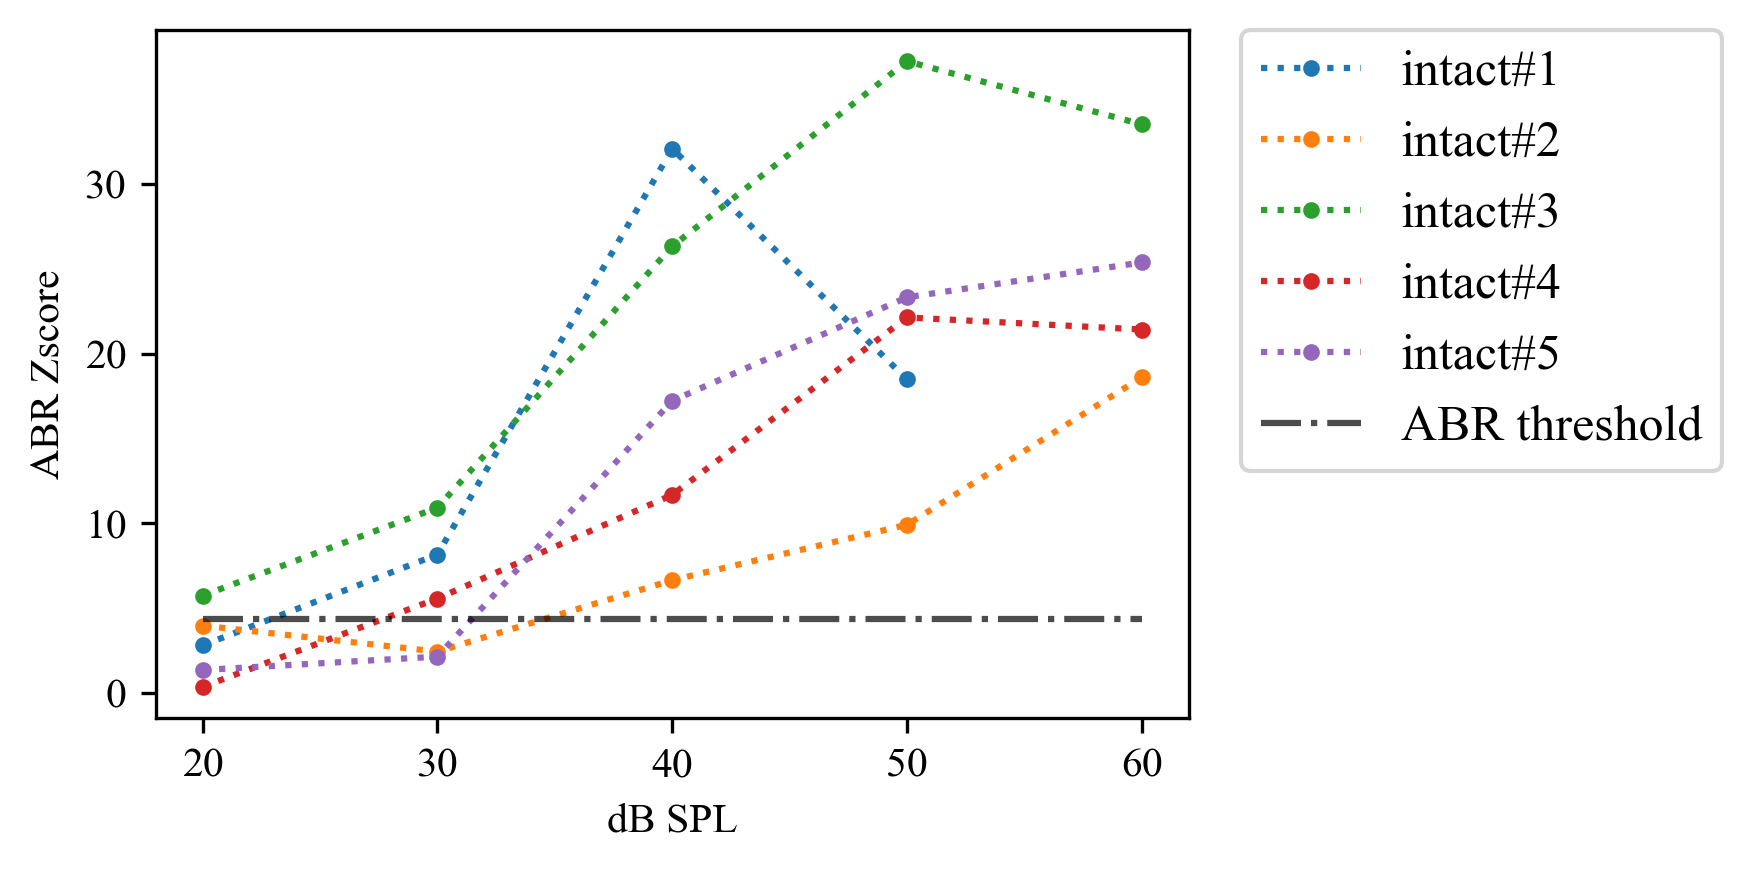

In [107]:
#各個体のデータを描画
os.makedirs("./result/abr_sound_each_value",exist_ok=True)
dBs = range(20,70,10)
fig,ax = plt.subplots(figsize=(6,3),dpi=300)
for i,date in enumerate(dates):    
    each_date_data =alive_sound_data[alive_sound_data["date"]==date]
    mean = each_date_data["abr_z_score"]
    ax.plot(list(dBs)[:len(mean)],mean,marker=".",linestyle="dotted",label=f"intact#{i+1}")
ax.plot([20,60],[4.36,4.36],color="k",alpha = 0.7, linestyle="-.",label="ABR threshold")
ax.set_xticks(list(dBs))
ax.set_xlabel("dB SPL")
ax.set_ylabel("ABR Zscore")
plt.legend(ncol=1,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
plt.tight_layout()
plt.savefig("./result/abr_sound_each_value/intact.png",facecolor="white")

In [108]:
np.std([40,40,30,30,30])

4.898979485566356

In [109]:
np.mean([40,40,30,30,30])

34.0

In [123]:
def save_figures_each_audible_status(target_df, param, threshold =0, dir_name="sound_datas_each_mouse",filename="deaf",ylabel=""):
    alive_sound_data = target_df[target_df["stim_params"].str.contains("dB")]
    dates = alive_sound_data["date"].drop_duplicates().values
    dates = np.sort(dates)
    os.makedirs(f"./result/{dir_name}",exist_ok=True)
    dBs = range(20,70,10)
    fig,ax = plt.subplots(figsize=(6,3),dpi=300)
    for i,date in enumerate(dates):    
        each_date_data =alive_sound_data[alive_sound_data["date"]==date]
        if len(each_date_data)>6 and "deaf" in filename:
            each_date_data=each_date_data[each_date_data["filename"]=="05_ex_click2"]
        mean = each_date_data[param]
        if "deaf" in filename:
            label =f"deaf#{i+1}"
        else:
            label = f"intact#{i+1}"
        ax.plot(list(dBs)[:len(mean)],mean,marker=".",linestyle="dotted",label=label)
    if threshold>0:
        ax.plot([20,60],[threshold,threshold],color="k",alpha = 0.7, linestyle="-.",label="threshold")
    ax.set_xticks(list(dBs))
    ax.set_xlabel("dB SPL")
    ax.set_ylabel(ylabel)
    plt.legend(ncol=1,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
    plt.tight_layout()
    plt.savefig(f"./result/{dir_name}/{filename}.png",facecolor="white")
    plt.close()
    return

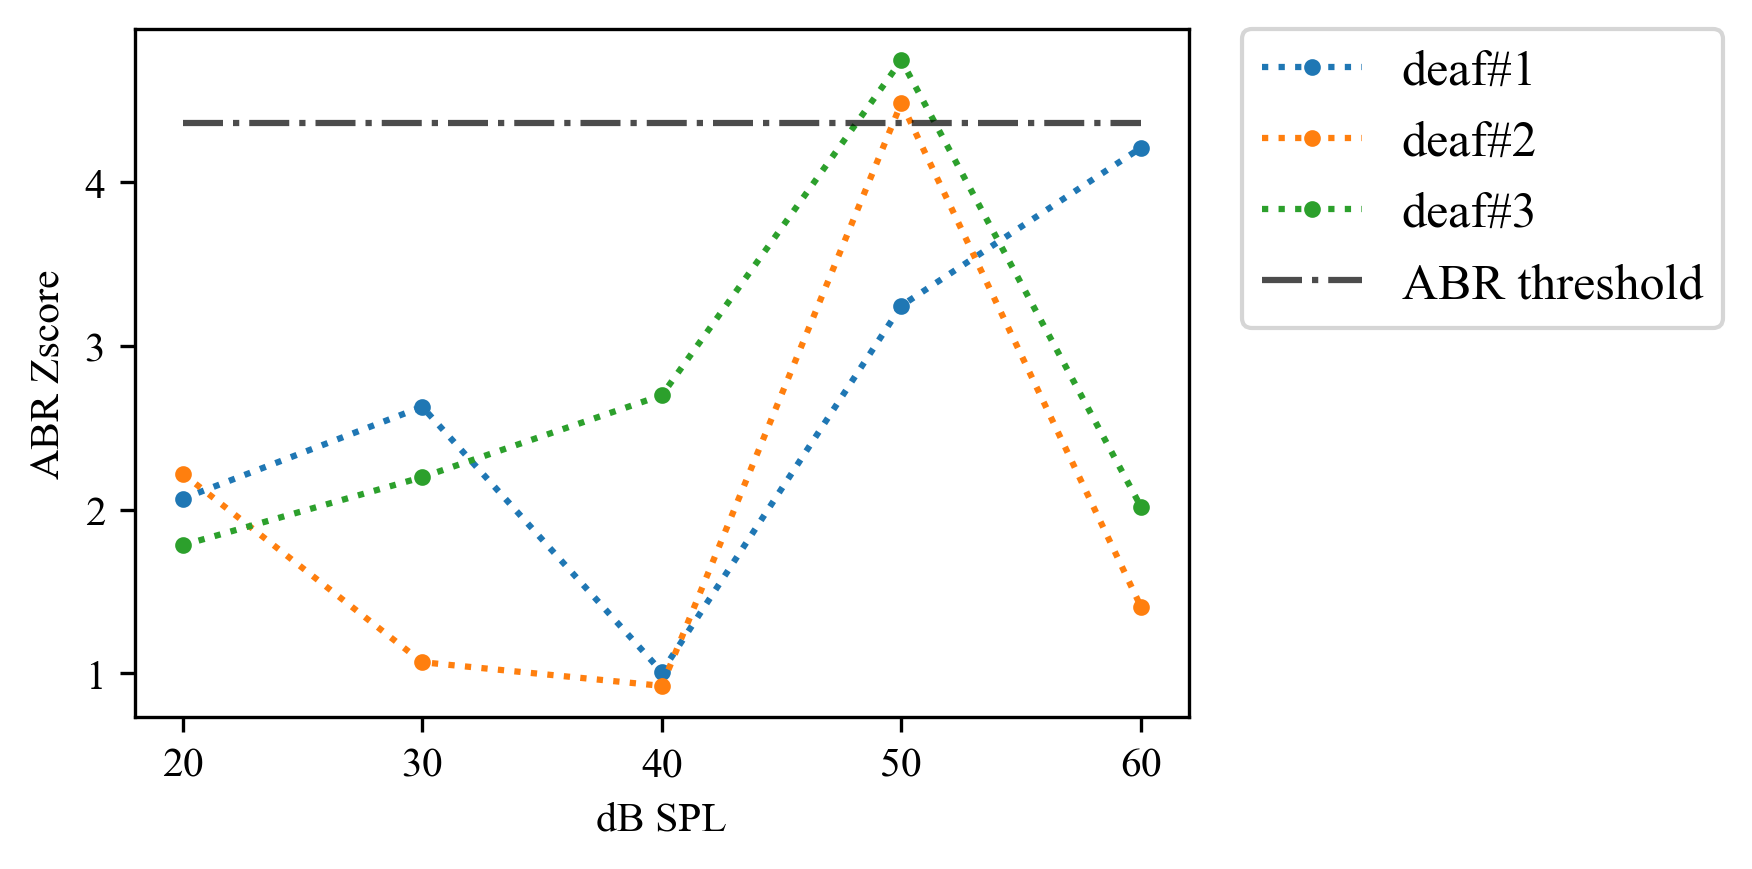

In [110]:
#難聴個体でも同様
alive_sound_data = alive_deaf_data[alive_deaf_data["stim_params"].str.contains("dB")]
dates = alive_sound_data["date"].drop_duplicates().values
dates = np.sort(dates)
os.makedirs("./result/abr_sound_each_value",exist_ok=True)
dBs = range(20,70,10)
fig,ax = plt.subplots(figsize=(6,3),dpi=300)
for i,date in enumerate(dates):    
    each_date_data =alive_sound_data[alive_sound_data["date"]==date]
    if len(each_date_data)>6:
        each_date_data=each_date_data[each_date_data["filename"]=="05_ex_click2"]
    mean = each_date_data["abr_z_score"]

    ax.plot(list(dBs)[:len(mean)],mean,marker=".",linestyle="dotted",label=f"deaf#{i+1}")
ax.plot([20,60],[4.36,4.36],color="k",alpha = 0.7, linestyle="-.",label="ABR threshold")
ax.set_xticks(list(dBs))
ax.set_xlabel("dB SPL")
ax.set_ylabel("ABR Zscore")
plt.legend(ncol=1,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
plt.tight_layout()
plt.savefig("./result/abr_sound_each_value/deaf.png",facecolor="white")

In [124]:
for depth in depths:
    lfp_threshold = threshold_pd.loc[f"lfp_z_score_{depth}","two_side_5%_sham"]
    save_figures_each_audible_status(alive_deaf_data,f"lfp_z_score_{depth}",lfp_threshold,"sound_lfp_datas",f"lfp_z_{depth}_deaf", f"LFP Zscore at {depth} μm")
    save_figures_each_audible_status(alive_deaf_data,f"lfp_latency_{depth}",0,"sound_lfp_datas",f"lfp_latency_{depth}_deaf", f"LFP latency at {depth} μm")
    save_figures_each_audible_status(alive_intact_data,f"lfp_z_score_{depth}",lfp_threshold,"sound_lfp_datas",f"lfp_z_{depth}", f"LFP Zscore at {depth} μm")
    save_figures_each_audible_status(alive_intact_data,f"lfp_latency_{depth}",0,"sound_lfp_datas",f"lfp_latency_{depth}", f"LFP latency at {depth} μm")

In [125]:
windows = us_df["window"].drop_duplicates().values
windows

array([ 0, 20, 50], dtype=int64)

In [135]:
color_dict ={
    0: "blue",
    20: "black",
    50: "orange"
}
os.makedirs("./result/us_lfp",exist_ok=True)
for depth in depths: 
    fig,ax =plt.subplots(figsize=(6,3), dpi=300)
    for window in windows:
        lfp_threshold = threshold_pd.loc[f"lfp_z_score_{depth}","two_side_5%_sham"]
        each_window_data = us_df[us_df["window"]==window]
        each_window_data = each_window_data.sort_values("duration")
        ax.errorbar(each_window_data["duration"],each_window_data[f"intact_lfp_{depth}_mean"],yerr=each_window_data[f"intact_lfp_{depth}_err"],capsize=3, color=color_dict[window],
                    linestyle="dotted",label=f"window {window}%")
        ax.set_xlabel("duration [ms]")
        ax.set_ylabel(f"LFP Zscore at {depth} μm")
    ax.plot([0.5,20],[lfp_threshold,lfp_threshold],color="k",alpha = 0.7, linestyle="-.",label="threshold")
    plt.legend(ncol=1,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
    plt.tight_layout()
    plt.savefig("./result/us_lfp/intact_lfp_zscore_{depth}μm")
    plt.close()
    fig,ax =plt.subplots(figsize=(6,3), dpi=300)
    for window in windows:
        lfp_threshold = threshold_pd.loc[f"lfp_z_score_{depth}","two_side_5%_sham"]
        each_window_data = us_df[us_df["window"]==window]
        each_window_data = each_window_data.sort_values("duration")
        ax.errorbar(each_window_data["duration"],each_window_data[f"deaf_lfp_{depth}_mean"],yerr=each_window_data[f"deaf_lfp_{depth}_err"],capsize=3, color=color_dict[window],
                    linestyle="dotted",label=f"window {window}%")
        ax.set_xlabel("duration [ms]")
        ax.set_ylabel(f"LFP Zscore at {depth} μm")
    ax.plot([0.5,20],[lfp_threshold,lfp_threshold],color="k",alpha = 0.7, linestyle="-.",label="threshold")
    plt.legend(ncol=1,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
    plt.tight_layout()
    plt.savefig(f"./result/us_lfp/deaf_lfp_zscore_{depth}μm.png",facecolor="white")
    plt.close()
